# TITANIC: Wrangling the Passenger Manifest

## Exploratory Analysis with ```Pandas```
On April 15, 1912, the RMS Titanic sunk after hitting an iceberg, killing 1502 out of 2224 passengers and crew about during her maiden voyage. While luck did play a role in the survival of some passengers, certain groups&mdash;women and childen&mdash;were much more likely to survive.

In this tutorial you will gain experience using ```pandas``` to visualize and clean data from the Titanic's passenger manifest. Afterwards it is also recommended that you complete the "additional_wrangling_challenge" notebook, which expands on these skills and is included in this course's repository.

**Be sure to read the README before you begin!** In addition, you may also find these resources helpful:  
https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/  
https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/

*This tutorial is based on the Kaggle Competition, "Predicting Survival Aboard the Titanic" https://www.kaggle.com/c/titanic*

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load the Data
The file we'll be exploring today, ```train.csv```, represents a subset of the Titanic's passenger manifest. It was downloaded when you cloned X503's GitHub repo and is located in the ```Data``` folder. The remaining data from the passenger manifest is in ```test.csv```, which is saved in the same folder and we'll use later on in the Machine Learning course. But for now, let's load the ```train.csv``` file and start exploring the data.

=> Load the ```train.csv``` file into a ```pandas``` ```DataFrame```.

Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [4]:
# Read the train.csv file as a dataframe using pandas: df
df = pd.read_csv('data/train.csv')

## Exploring the Data

=> Use ```pandas``` to view the "head" of the file with the first 10 rows.

Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html

In [5]:
# Use pandas to view the first 10 rows of the file
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


*What did you see? When exploring a new data set, these are some of the first questions you should try to answer.*
 * Are there any missing values?
 * What kinds of values/numbers/text are there?
 * Are the values continuous or categorical?
 * Are some variables more sparse than others?
 * Are there multiple values in a single column?

#### Summary Statistics

__=>__ Use ```pandas``` to get summary statistics on the numerical fields in the data.

Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

In [6]:
# Use pandas to get the summary statistics on the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


*What can we infer from the summary statistics?*
 * How many missing values does the `Age` column have?
 * What percentage of the passengers survived?
 * How many passengers traveled in Class 3?
 * Are there any outliers in the `Fare` column?

__=>__ Use ```pandas``` to get the median of the ```Age``` column.

Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html

In [8]:
# Use pandas to get the median of the Age column
df.Age.median()

28.0

__=>__ Use ```pandas``` to find the number of unique values in the ```Ticket``` column.

Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html

In [9]:
# Use pandas to find the number of unique values in the Ticket column
df.Ticket.nunique()

681

The ```Ticket``` column has a large number of unique values. As we saw above in our initial exploration of the data, this feature includes a combination of text and numerical data. Therefore, let's use ```value_counts()``` to generate a frequency distribution of the ```Ticket``` values, so we can see whether this data will be useful for our models.

__=>__ Use ```pandas``` to count the number of each unique value in the ```Ticket``` column.

Documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

In [10]:
# Use pandas to count the number of each unique Ticket value
df.Ticket.value_counts()

CA. 2343     7
347082       7
1601         7
3101295      6
CA 2144      6
            ..
S.P. 3464    1
113055       1
9234         1
250643       1
349205       1
Name: Ticket, Length: 681, dtype: int64

## Visualize the Data
Now let's look at two histograms of the ```Fare``` data. In the first, we'll set ```bins=10``` and in the second ```bin=50```. Which one do you find the most helpful? What are you able to tell about the range of fares paid by the passengers from the histograms?

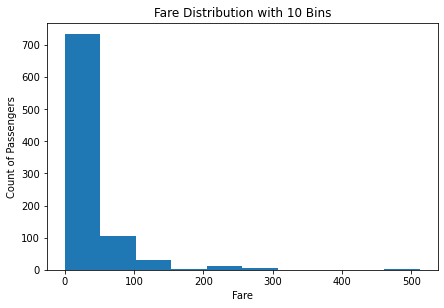

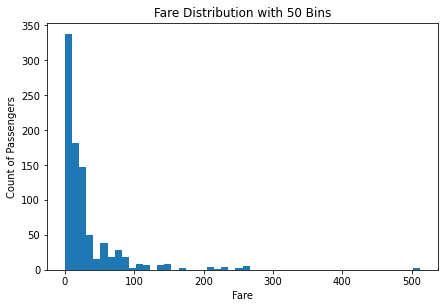

In [11]:
fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(211)
ax.hist(df['Fare'], bins=10, range=(df['Fare'].min(),df['Fare'].max()))
plt.title('Fare Distribution with 10 Bins')
plt.xlabel('Fare')
plt.ylabel('Count of Passengers')
plt.show()

fig = plt.figure(figsize=(7,10))
ax = fig.add_subplot(212)
ax.hist(df['Fare'], bins=50, range=(df['Fare'].min(),df['Fare'].max()))
plt.title('Fare Distribution with 50 Bins')
plt.xlabel('Fare')
plt.ylabel('Count of Passengers')
plt.show()

## Data Wrangling
It's important to wrangle your data before building your models, since ```scikit-learn``` cannot process missing values and only accepts numerical data. Outliers should also be dealt with beforehand, since they will negatively impact the performance of most machine learning models. 

### Outliers
When examining the histograms of the ```Fare``` data, did you notice any potential outliers? Since there is a relationship between the cost of a ticket and the class the passenger was traveling in, let's look at a box plot of this data to investigate further. 

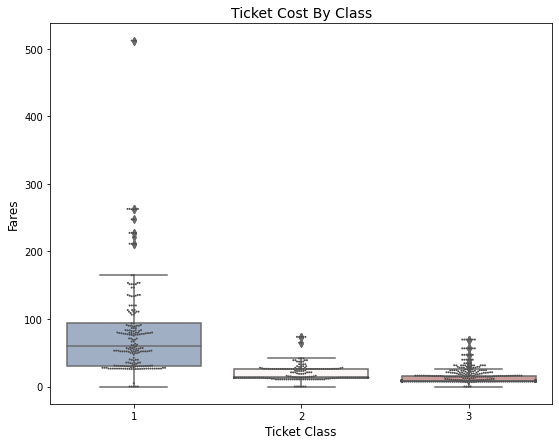

In [12]:
f, ax = plt.subplots(figsize=(9,7))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='vlag')
sns.swarmplot(x='Pclass', y='Fare', data=df, size=2, color='0.3')
plt.title('Ticket Cost By Class', size=14)
plt.xlabel('Ticket Class', size=12)
plt.ylabel('Fares', size=12)
plt.show()

We can quickly see that there a few first-class fares that are much higher than the others. Let's sort the data set by the ```Fare``` column so we can see the cost of the most expensive tickets.

In [13]:
df.sort_values(by='Fare', ascending=False).head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C


Since the ```$512``` fares appear to be outliers, let's replace them with ```$213```, since it is the second highest value and much closer to the other data points.

In [14]:
for idx in df.index:
    if df.loc[idx].Fare > 500:
        df.at[idx, 'Fare'] = 263.0000

### Dealing with Missing Data
When deciding how to handle missing values, it is important to know how prevalent they are in your data. Let's use ```pandas``` to find out how many ```Cabin``` values are missing from our data set.

__=>__ Use ```pandas``` to get the sum of all the null values in the ```Cabin``` column.

Documentation:    
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html

In [35]:
# Sum the number of null Cabin values
df[df['Cabin'].isna()]['Cabin'].sum()

0

### Deleting a Feature


__=>__ Since most of the ```Cabin``` values are missing, let's use ```pandas``` to drop the column. We will also drop the ```Ticket``` column, since as we saw earlier, it contains of a mix of text and numeric data that doesn't appear to contain any useful information. *HINT: remember to set ```axis=1```.*

Documentation:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
https://chrisalbon.com/python/pandas_dropping_column_and_rows.html

In [42]:
# Use pandas to drop the Cabin and Ticket columns
df=df.drop('Cabin',axis=1)
df=df.drop('Ticket',axis=1)


### Filling in Missing Data
While the ```Age``` column also contains null values, it is missing far fewer than the ```Cabin``` column, so we will fill those in rather than drop the column. The simplest approach, which we'll use here, is to replace the null values with the mean age of the passengers.

__=>__ First use ```pandas``` to calculate and save the mean age of the passengers. Then replace the null values in the ```Age``` column with that number.

Documentation:  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html  
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

In [47]:
# First, use pandas to find the mean age of the passengers: mean_age
mean_age = df.Age.mean()

# ...and then fill in the null Age values with mean_age
df['Age']=df.Age.fillna(mean_age)



In [52]:
# Check that there are no more null values in the Age column
df[df.Age.isna()]['Age'].sum()

0.0

### Save Your Work
...you will need it in a few weeks!

In [53]:
import pandas.io.sql as pd_sql
import sqlite3 as sql

# Create a sqlite3 database to store the data.
con = sql.connect('titanic.db') 

__=>__ Use ```pandas``` to write your ```DataFrame``` to the ```sqlite``` database.

Documenation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_sql.html

In [56]:
# Use pandas to save your dataframe to a sqlite database name 'training_data'
df.to_sql('training_data', con=con, if_exists='replace')

In [57]:
# Close your connection to the database
con.close()

In [ ]:
con = sql.connect('titanic.db') 